<h3>numpy로 data 준비</h3>

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

np.column_stack(([1, 2, 3], [4, 5, 6])) #연결 list는 tuple로 전달

array([[1, 4],
       [2, 5],
       [3, 6]])

In [3]:
fish_data=np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [4]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [5]:
fish_target=np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


<h3>사이킷런으로 훈련셋/테스트셋 나누기</h3>

In [6]:
from sklearn.model_selection import train_test_split

#test set 25% default
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [8]:
print(train_target.shape, test_target.shape) #1차원 배열 tuple

(36,) (13,)


In [9]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
#sampling bias 해결 (stratify에 fish_target 전달)
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


<h3>k-최근접 이웃 훈련</h3>
-특성의 scale이 달라 예측 이상

In [11]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [12]:
print(kn.predict([[25, 150]]))

[0.]


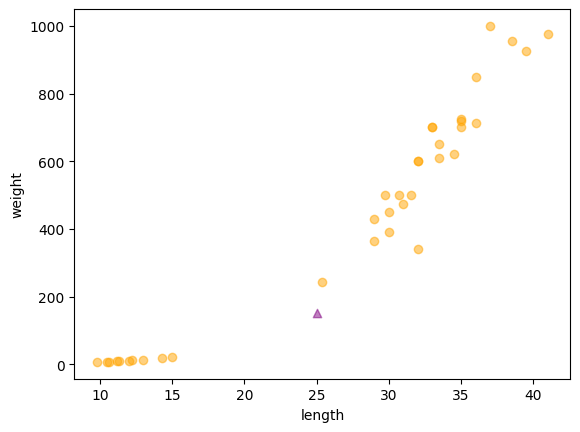

In [13]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1], c='orange', alpha=0.5)
plt.scatter(25, 150, c='purple', alpha=0.5, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

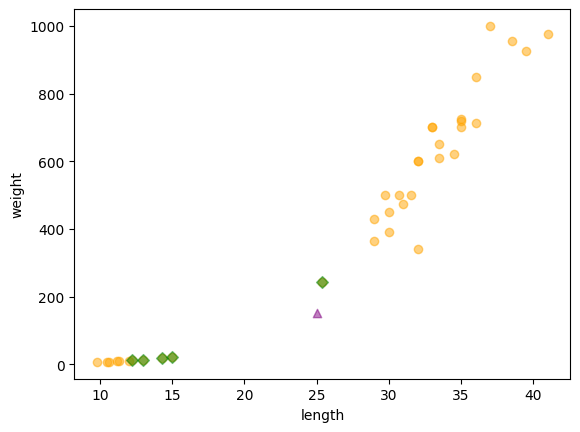

In [16]:
distances, indexes = kn.kneighbors([[25, 150]])

plt.scatter(train_input[:, 0], train_input[:, 1], c='orange', alpha=0.5)
plt.scatter(25, 150, c='purple', alpha=0.5, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D', c='green', alpha=0.5)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [17]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [18]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [19]:
print(distances) #이웃 샘플까지 거리

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


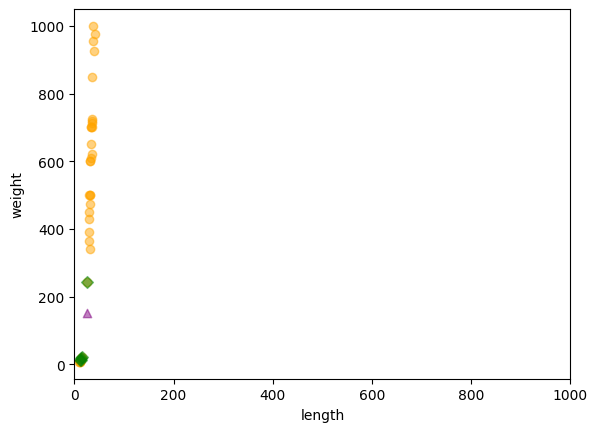

In [20]:
plt.scatter(train_input[:, 0], train_input[:, 1], c='orange', alpha=0.5)
plt.scatter(25, 150, c='purple', alpha=0.5, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D', c='green', alpha=0.5)
plt.xlim((0, 1000)) #x축 범위 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

<h3>표준점수</h3>
-가장 널리 사용되는 전처리 방법 (z점수) <br>
-각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지 나타냄

In [21]:
mean=np.mean(train_input, axis=0) #평균
std=np.std(train_input, axis=0) #표준편차

print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [22]:
#표준점수 (broadcasting)
train_scaled=(train_input-mean)/std

<h3>전처리 data로 모델 훈련</h3>
<h4>test set 기준 맞추기 (중요!)</h4>

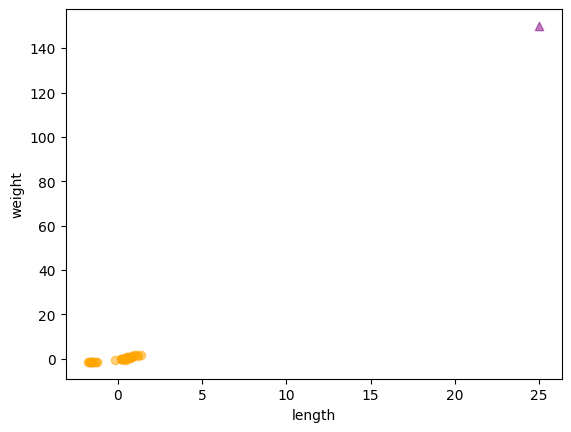

In [23]:
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c='orange', alpha=0.5)
plt.scatter(25, 150, c='purple', alpha=0.5, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

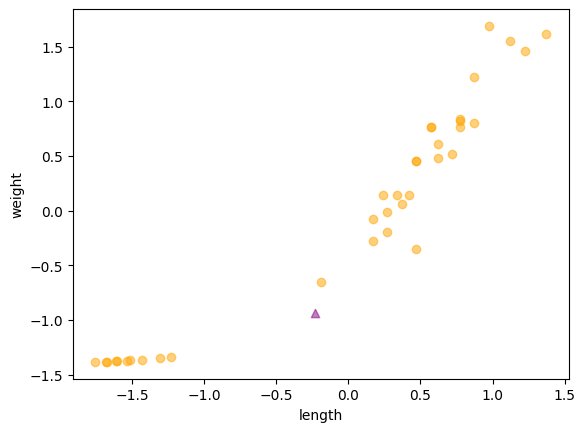

In [24]:
#동일 기준으로 sample 변환
new = ([25, 150]-mean)/std
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c='orange', alpha=0.5)
plt.scatter(new[0], new[1], c='purple', alpha=0.5, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [25]:
kn.fit(train_scaled, train_target)
test_scaled = (test_input-mean)/std

kn.score(test_scaled, test_target)

1.0

In [26]:
print(kn.predict([new]))

[1.]


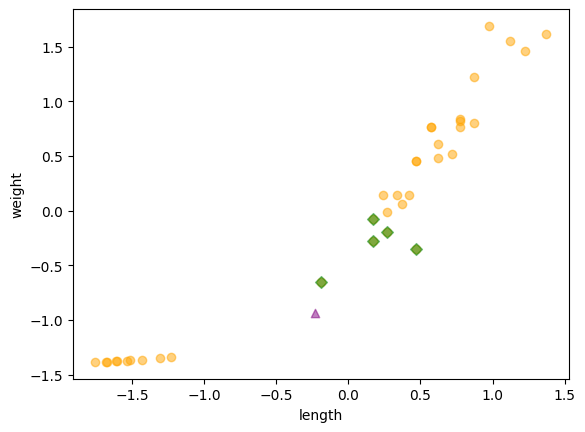

In [27]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:, 0], train_scaled[:, 1], c='orange', alpha=0.5)
plt.scatter(new[0], new[1], c='purple', alpha=0.5, marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D', c='green', alpha=0.5)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()